--------------------------------------------
---------------------------------------------

# PART ONE
-------------------------------
--------------------------------
# QUESTION:

• **DOMAIN**: Digital content and entertainment industry

• **CONTEXT**: The objective of this project is to build a text classification model that analyses the customer's sentiments based on their reviews in the IMDB database. The model uses a complex deep learning model to build an embedding layer followed by a classification algorithm to analyse the sentiment of the customers.

• **DATA DESCRIPTION**: The Dataset of 50,000 movie reviews from IMDB, labelled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, the words are indexed by their frequency in the dataset, meaning the for that has index 1 is the most frequent word. Use the first 20 words from each review to speed up training, using a max vocabulary size of 10,000. As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

• **PROJECT OBJECTIVE**: Build a sequential NLP classifier which can use input text parameters to determine the customer sentiments.

Steps and tasks: [ Total Score: 30 points]

1. Import and analyse the data set.

    Hint: - Use `imdb.load_data()` method

     * Get train and test set
     * Take 10000 most frequent words


2. Perform relevant sequence adding on the data
3. Perform following data analysis:

      • Print shape of features and labels

      • Print value of any one feature and it's label

4. Decode the feature value to get original sentence
5. Design, train, tune and test a sequential model.

     Hint: The aim here Is to import the text, process it such a way that it can be taken as an inout to the ML/NN classifiers. Be analytical and experimental here in trying new approaches to design the best model.

6. Use the designed model to print the prediction on any one sample.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import packages
%tensorflow_version 2.x
import pandas as pd, numpy as np
import tensorflow as tf

from itertools import islice

In [3]:
# Keras
from keras.layers import Dense, Embedding, LSTM, Dropout, MaxPooling1D, Conv1D
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, Sequential
from keras.preprocessing import sequence
from keras.datasets import imdb

from keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

random_state = 42
np.random.seed(random_state)
tf.random.set_seed(random_state)
import warnings
warnings.filterwarnings('ignore')

>  * The Dataset of 50,000 movie reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers).
>  * For convenience, the words are indexed by their frequency in the dataset, meaning the for that has index 1 is the most frequent word.
>  * Use the first 20 words from each review to speed up training, using a max vocab size of 10,000.
>  * As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

### 1. **Import and analyse the data set.**
    >Hint: - Use imdb.load_data() method

*   Get train and test set
*   Take 10000 most frequent words

In [4]:
vocab_size = 10000
maxlen = 300
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = vocab_size)

print('---'*20, "\nX train")
print(x_train)
print('---'*20, "\nX test")
print(x_test)

17473536/17464789 [==============================] - 0s 0us/step
------------------------------------------------------------ 
X train
[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 

In [5]:
max([max(seq) for seq in x_train])

9999

**Here we have splited data into x train and xtest with 10000 most frequent words**



### **2. Perform relevant sequence adding on the data**


In [6]:
x_train = pad_sequences(x_train, maxlen = maxlen, padding = 'pre')
x_test =  pad_sequences(x_test, maxlen = maxlen, padding = 'pre')



In [7]:
print('---'*20, "\nX train")
print(x_train)
print('---'*20, "\nX test")
print(x_test)

------------------------------------------------------------ 
X train
[[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 ...
 [   0    0    0 ...    4 3586    2]
 [   0    0    0 ...   12    9   23]
 [   0    0    0 ...  204  131    9]]
------------------------------------------------------------ 
X test
[[   0    0    0 ...   14    6  717]
 [   0    0    0 ...  125    4 3077]
 [1239 5189  137 ...    9   57  975]
 ...
 [   0    0    0 ...   21  846 5518]
 [   0    0    0 ... 2302    7  470]
 [   0    0    0 ...   34 2005 2643]]


In [8]:
X = np.concatenate((x_train, x_test), axis = 0)
y = np.concatenate((y_train, y_test), axis = 0)



### **3. Perform following data analysis:**

      • Print shape of features and labels

      • Print value of any one feature and it's label

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state, shuffle = True)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2, random_state = random_state, shuffle = True)


In [10]:
print('---'*20, f'\nNumber of rows in training dataset: {x_train.shape[0]}')
print(f'Number of columns in training dataset: {x_train.shape[1]}')
print(f'Number of unique words in training dataset: {len(np.unique(np.hstack(x_train)))}')


print('---'*20, f'\nNumber of rows in validation dataset: {x_valid.shape[0]}')
print(f'Number of columns in validation dataset: {x_valid.shape[1]}')
print(f'Number of unique words in validation dataset: {len(np.unique(np.hstack(x_valid)))}')


print('---'*20, f'\nNumber of rows in test dataset: {x_test.shape[0]}')
print(f'Number of columns in test dataset: {x_test.shape[1]}')
print(f'Number of unique words in test dataset: {len(np.unique(np.hstack(x_test)))}')


print('---'*20, f'\nUnique Categories: {np.unique(y_train), np.unique(y_valid), np.unique(y_test)}')

------------------------------------------------------------ 
Number of rows in training dataset: 32000
Number of columns in training dataset: 300
Number of unique words in training dataset: 9999
------------------------------------------------------------ 
Number of rows in validation dataset: 8000
Number of columns in validation dataset: 300
Number of unique words in validation dataset: 9984
------------------------------------------------------------ 
Number of rows in test dataset: 10000
Number of columns in test dataset: 300
Number of unique words in test dataset: 9995
------------------------------------------------------------ 
Unique Categories: (array([0, 1]), array([0, 1]), array([0, 1]))


### **4. Decode the feature value to get original sentence**

In [11]:
def decode_review(x, y):
  w2i = imdb.get_word_index()                                
  w2i = {k:(v + 3) for k, v in w2i.items()}
  w2i['<PAD>'] = 0
  w2i['<START>'] = 1
  w2i['<UNK>'] = 2
  i2w = {i: w for w, i in w2i.items()}

  ws = (' '.join(i2w[i] for i in x))
  print(f'Review: {ws}')
  print(f'Actual Sentiment: {y}')
  return w2i, i2w

w2i, i2w = decode_review(x_train[0], y_train[0])

# get first 50 key, value pairs from id to word dictionary
print('---'*30, '\n', list(islice(i2w.items(), 0, 50)))

1654784/1641221 [==============================] - 0s 0us/step
Review: <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> the only possible way to enjoy this flick is to bang your head against the wall allow some internal <UNK> of the brain let a bunch of your brain cells die and once you are officially mentally retarded perhaps then you might enjoy this film br br the only saving grace was the story between <UNK> and stephanie govinda was excellent in the role of the cab driver and so was the brit girl perhaps if they would have created the whole movie on their <UNK> in india and how they eventually fall in l

### **5. Design, train, tune and test a sequential model.**

>> Hint: The aim here Is to import the text, process it such a way that it can be taken as an inout to the ML/NN classifiers. Be analytical and experimental here in trying new approaches to design the best model.

We can think of the Embedding layer as a dicionary that maps a index assigned to a word to a word vector. This layer is very flexible and can be used in a few ways:

>  * The embedding layer can be used at the start of a larger deep learning model.
>  * Also we could load pre-train word embeddings into the embedding layer when we create our model.
>  * Use the embedding layer to train our own word2vec models.

The keras embedding layer doesn't require us to onehot encode our words, instead we have to give each word a unqiue intger number as an id. For the imdb dataset we've loaded this has already been done, but if this wasn't the case we could use sklearn LabelEncoder.



In [20]:
model = Sequential()
model.add(Embedding(vocab_size, 256, input_length = maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(256, 5, padding = 'same', activation = 'relu', strides = 1))
model.add(Conv1D(128, 5, padding = 'same', activation = 'relu', strides = 1))
model.add(MaxPooling1D(pool_size = 2))
model.add(Conv1D(64, 5, padding = 'same', activation = 'relu', strides = 1))
model.add(MaxPooling1D(pool_size = 2))
model.add(LSTM(75))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())

# Adding callbacks
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 4)  
mc = ModelCheckpoint('imdb_model.h5', monitor = 'val_loss', mode = 'min', save_best_only = True, verbose = 1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 256)          2560000   
                                                                 
 dropout_1 (Dropout)         (None, 300, 256)          0         
                                                                 
 conv1d_3 (Conv1D)           (None, 300, 256)          327936    
                                                                 
 conv1d_4 (Conv1D)           (None, 300, 128)          163968    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 150, 128)         0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 150, 64)           41024     
                                                      

In [21]:
# Fit the model
history = model.fit(x_train, y_train, validation_data = (x_valid, y_valid), epochs = 10, batch_size = 64, verbose = True, callbacks = [es, mc])

# Evaluate the model
scores = model.evaluate(x_test, y_test, batch_size = 64)
print('Test accuracy: %.2f%%' % (scores[1]*100))

Epoch 1/10
500/500 [==============================] - ETA: 0s - loss: 0.3524 - accuracy: 0.8327
Epoch 1: val_loss improved from inf to 0.25257, saving model to imdb_model.h5
500/500 [==============================] - 92s 180ms/step - loss: 0.3524 - accuracy: 0.8327 - val_loss: 0.2526 - val_accuracy: 0.8980
Epoch 2/10
500/500 [==============================] - ETA: 0s - loss: 0.1877 - accuracy: 0.9268
Epoch 2: val_loss improved from 0.25257 to 0.25129, saving model to imdb_model.h5
500/500 [==============================] - 90s 180ms/step - loss: 0.1877 - accuracy: 0.9268 - val_loss: 0.2513 - val_accuracy: 0.8951
Epoch 3/10
500/500 [==============================] - ETA: 0s - loss: 0.1308 - accuracy: 0.9532
Epoch 3: val_loss did not improve from 0.25129
500/500 [==============================] - 89s 179ms/step - loss: 0.1308 - accuracy: 0.9532 - val_loss: 0.3079 - val_accuracy: 0.8810
Epoch 4/10
500/500 [==============================] - ETA: 0s - loss: 0.0858 - accuracy: 0.9707
Epoch 4

In [22]:

y_pred = (model.predict(x_test) > 0.5).astype("int32")

print(f'Classification Report:\n{classification_report(y_pred, y_test)}')

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4802
           1       0.91      0.89      0.90      5198

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [23]:
print('Test accuracy: %.2f%%' % (scores[1]*100))

313/313 [==============================] - 8s 25ms/step - loss: 0.3879 - accuracy: 0.8940


[0.3879014551639557, 0.8939999938011169]

### **6. Use the designed model to print the prediction on any one sample.**

In [24]:
sample_x_test = x_test[np.random.randint(10000)]
for layer in model.layers:

    model_layer = Model(inputs = model.input, outputs = model.get_layer(layer.name).output)
    output = model_layer.predict(sample_x_test.reshape(1,-1))
    print('\n','--'*20, layer.name, 'layer', '--'*20, '\n')
    print(output)


 ---------------------------------------- embedding_1 layer ---------------------------------------- 

[[[-0.03188964 -0.01806061 -0.02352197 ...  0.04295323 -0.0378476
    0.0063071 ]
  [-0.03188964 -0.01806061 -0.02352197 ...  0.04295323 -0.0378476
    0.0063071 ]
  [-0.03188964 -0.01806061 -0.02352197 ...  0.04295323 -0.0378476
    0.0063071 ]
  ...
  [-0.02058502 -0.03895939 -0.04753456 ...  0.00506797 -0.01469365
    0.03755577]
  [ 0.01560587 -0.03781115 -0.00481099 ... -0.02081791  0.06329658
   -0.05020565]
  [ 0.0286226  -0.06195676 -0.12254899 ...  0.0626746   0.02030624
    0.01709203]]]

 ---------------------------------------- dropout_1 layer ---------------------------------------- 

[[[-0.03188964 -0.01806061 -0.02352197 ...  0.04295323 -0.0378476
    0.0063071 ]
  [-0.03188964 -0.01806061 -0.02352197 ...  0.04295323 -0.0378476
    0.0063071 ]
  [-0.03188964 -0.01806061 -0.02352197 ...  0.04295323 -0.0378476
    0.0063071 ]
  ...
  [-0.02058502 -0.03895939 -0.04753456 

**Predicting sample**

In [25]:
decode_review(x_test[10], y_test[10])
print(f'Predicted sentiment: {y_pred[10]}')

Review: <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <P

**Review :** this movie was great and i was waiting for it for a long time when it finally came out i was really happy and looked forward to a 10 out of 10 it was great and lived up to my potential the performances were great on the part of the adults and most of the kids the only bad performance was by milo himself there was one problem that i encountered with this and others like it movie all of the characters i wanted to live were getting killed overall i give this movie an excellent 9 out of 10 maybe we should <UNK> better people to kill next time though ok

**We can see that the predicted sentiment and actual sentiment is correct**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


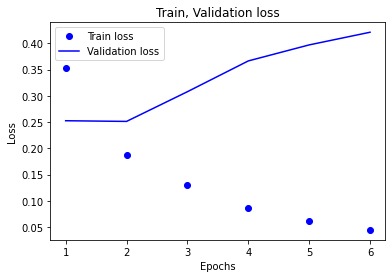

In [26]:
history_dict = history.history
print(history_dict.keys())
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = history_dict['accuracy']
epochs = range(1,len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Train loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Train, Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

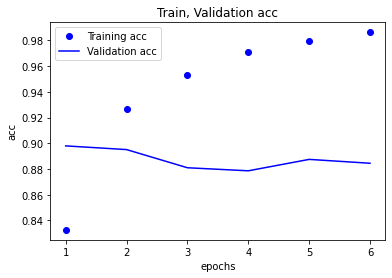

In [27]:
plt.clf()

acc_values = acc
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Train, Validation acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()

plt.show()

# **CONCLUSION**
---
| Criteria | precision  | recall | f1-score  | support | 
| --- | --- | --- | --- | --- |
| 0 |  0.88   |   0.90   |   0.89  |    4802 |
|1    | 0.91   |   0.89   |   0.90  |    4551 |


---
| accuracy  | 0.89 |
| --- | --- |

---

| Avg type | precision  | recall | f1-score  | support | 
| --- | --- | --- | --- | --- |
| macro avg  |     0.89  |    0.89   |   0.89   |  10000 |
|weighted avg  |     0.89   |   0.89   |   0.89   |  10000|


> **We can see that the f1 score is around ~0.89**. 

> **Accuracy overall is around 89%**

> **We have almost close precision than recall for negative reviews and  positive reviews**

> **We can improve the accuracy by continuous training with more epochs.**

----
### PREDICTION 
**Review :** this movie was great and i was waiting for it for a long time when it finally came out i was really happy and looked forward to a 10 out of 10 it was great and lived up to my potential the performances were great on the part of the adults and most of the kids the only bad performance was by milo himself there was one problem that i encountered with this and others like it movie all of the characters i wanted to live were getting killed overall i give this movie an excellent 9 out of 10 maybe we should <UNK> better people to kill next time though ok

**We can see that the predicted sentiment and actual sentiment is correct**





--------------------------------------------
---------------------------------------------

# PART TWO
-------------------------------
--------------------------------

• **DOMAIN**: Social media analytics

• **CONTEXT**: Past studies in Sarcasm Detection mostly make use of Twitter datasets collected using hashtag based supervision but such datasets are noisy in terms of labels and language. Furthermore, many tweets are replies to other tweets and detecting sarcasm in these requires the availability of contextual tweets.In this hands-on project, the goal is to build a model to detect whether a sentence is sarcastic or not, using Bidirectional LSTMs.

• **DATA DESCRIPTION**:
The dataset is collected from two news websites, theonion.com and huffingtonpost.com.

This new dataset has the following advantages over the existing Twitter datasets:

Since news headlines are written by professionals in a formal manner, there are no spelling mistakes and informal usage. This reduces the sparsity and also increases the chance of finding pre-trained embeddings.

Furthermore, since the sole purpose of TheOnion is to publish sarcastic news, we get high-quality labels with much less noise as compared to Twitter datasets.

Unlike tweets that reply to other tweets, the news headlines obtained are self-contained. This would help us in teasing apart the real sarcastic elements

Content: Each record consists of three attributes:

is_sarcastic: 1 if the record is sarcastic otherwise 0

headline: the headline of the news article

article_link: link to the original news article. Useful in collecting supplementary data

 Reference: https://github.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection

• **PROJECT OBJECTIVE**: Build a sequential NLP classifier which can use input text parameters
to determine the customer sentiments.
Steps and tasks: [ Total Score: 30 points]
1. Read and explore the data
2. Retain relevant columns
3. Get length of each sentence
4. Define parameters
5. Get indices for words
6. Create features and labels
7. Get vocabulary size
8. Create a weight matrix using GloVe embeddings
9. Define and compile a Bidirectional LSTM model.

 Hint: Be analytical and experimental here in trying new approaches to design the best model.
10. Fit the model and check the validation accuracy

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout,Bidirectional,GRU
import tensorflow as tf
import os
import random, re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Model, Sequential

# Set random state
random_state = 42
np.random.seed(random_state)
tf.random.set_seed(random_state)

In [29]:
import nltk; nltk.download('wordnet'); nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string

nltk.download('averaged_perceptron_tagger')

appos = {"ain't": "am not", "aren't": "are not", "can't": "cannot", 
         "can't've": "cannot have", "'cause": "because", 
         "could've": "could have", "couldn't": "could not", 
         "couldn't've": "could not have", "didn't": "did not", 
         "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
         "hadn't've": "had not have", "hasn't": "has not", 
         "haven't": "have not", "he'd": "he would", "he'd've": "he would have", 
         "he'll": "he will", "he'll've": "he will have", 
         "he's": "he is", "how'd": "how did", 
         "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
         "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
         "I'll've": "I will have", "I'm": "I am", "I've": "I have", 
         "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
         "it'll": "it will", "it'll've": "it will have", "it's": "it is", 
         "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
         "might've": "might have", "mightn't": "might not", 
         "mightn't've": "might not have", "must've": "must have", 
         "mustn't": "must not", "mustn't've": "must not have", 
         "needn't": "need not", "needn't've": "need not have",
         "o'clock": "of the clock", "oughtn't": "ought not", 
         "oughtn't've": "ought not have", "shan't": "shall not", 
         "sha'n't": "shall not", "shan't've": "shall not have", 
         "she'd": "she would", "she'd've": "she would have", 
         "she'll": "she will", "she'll've": "she will have",
         "she's": "she is", "should've": "should have", 
         "shouldn't": "should not", "shouldn't've": "should not have", 
         "so've": "so have", "so's": "so is", 
         "that'd": "that had", "that'd've": "that would have", 
         "that's": "that that is", "there'd": "there would", 
         "there'd've": "there would have", "there's": "there is", 
         "they'd": "they would", "they'd've": "they would have", 
         "they'll": "they will", "they'll've": "they will have", 
         "they're": "they are", "they've": "they have", 
         "to've": "to have", "wasn't": "was not", "we'd": "we would", 
         "we'd've": "we would have", "we'll": "we will", 
         "we'll've": "we will have", "we're": "we are", 
         "we've": "we have", "weren't": "were not", 
         "what'll": "what will", "what'll've": "what will have", 
         "what're": "what are", "what's": "what is", 
         "what've": "what have", "when's": "when is", 
         "when've": "when have", "where'd": "where did", 
         "where's": "where is", "where've": "where have", 
         "who'll": "who will", "who'll've": "who will have", 
         "who's": "who is", "who've": "who have", 
         "why's": "why is", "why've": "why have", "will've": "will have", 
         "won't": "will not", "won't've": "will not have",
         "would've": "would have", "wouldn't": "would not", 
         "wouldn't've": "would not have", "y'all": "you all", 
         "y'all'd": "you all would", "y'all'd've": "you all would have", 
         "y'all're": "you all are", "y'all've": "you all have", 
         "you'd": "you would", "you'd've": "you would have",
         "you'll": "you will", "you'll've": "you will have", 
         "you're": "you are", "you've": "you have"}

# Helper function to replace appos
def replace_words(headline):
    cleaned_headlines = []
    for word in str(headline).split():
        if word.lower() in appos.keys():
            cleaned_headlines.append(appos[word.lower()])
        else:
            cleaned_headlines.append(word)
    return ' '.join(cleaned_headlines)

# Helper function to remove punctuations
PUNCT_TO_REMOVE = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~' #string.punctuation
def remove_punctuation(text):
    """function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

# Helper function to lemmatize
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
  return ''.join([lemmatizer.lemmatize(word) for word in text])

# Helper function to remove stopwords
stoplist = set(stopwords.words('english'))
stoplist.remove('not')
def remove_stopwords(text):
    """function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in stoplist])

# Helper function for wordcloud
def plot_wordcloud(text, mask = None, max_words = 500, max_font_size = 40, 
                   figure_size = (12, 6), title = None, title_size = 15):
    wordcloud = WordCloud(background_color = 'white', max_words = max_words,
                          random_state = 42, width = 350, height = 150, 
                          mask = mask, stopwords = stoplist, collocations = False)
    wordcloud.generate(str(text))
    
    plt.figure(figsize = figure_size)
    plt.imshow(wordcloud, interpolation = 'bilinear');
    plt.title(title, fontdict = {'size': title_size, 'color': 'black', 
                               'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

# Second helper function for lemmatizing
lemmatizer = WordNetLemmatizer()
def lem(text):
    pos_dict = {'N': wn.NOUN, 'V': wn.VERB, 'J': wn.ADJ, 'R': wn.ADV}
    return(' '.join([lemmatizer.lemmatize(w,pos_dict.get(t, wn.NOUN)) for w,t in nltk.pos_tag(text.split())]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


### **1. Read and explore the data**

**Read data**

In [30]:
project_path = "/content/drive/My Drive/aiml/nlp/project2/"

os.chdir(project_path)

data = pd.read_json(project_path + 'Sarcasm_Headlines_Dataset.json', lines = True)
print(f'Data has {data.shape[0]} rows and {data.shape[1]} columns. First 5 rows: ')
display(data.head())

Data has 28619 rows and 3 columns. First 5 rows: 


,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


**Explore data**

Check null data

In [31]:
data.isna().sum()

is_sarcastic    0
headline        0
article_link    0
dtype: int64

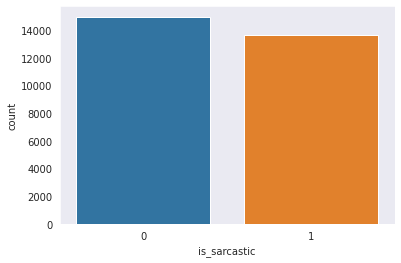

In [32]:
sns.set_style("dark")
sns.countplot(data.is_sarcastic)

------------------------------------------------------------
Value Counts for `is_sarcastic` label
------------------------------------------------------------
Is Sarcastic count: 13634 i.e. 48.0%
Isn't Sarcastic count: 14985 i.e. 52.0%
------------------------------------------------------------
Distributon of `is_sarcastic` label
------------------------------------------------------------


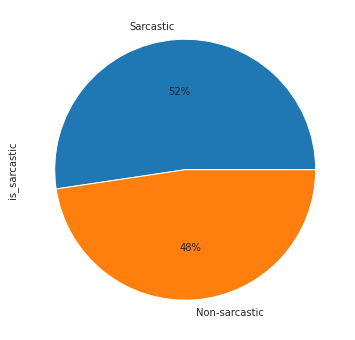

In [33]:
print('--'*30); print('Value Counts for `is_sarcastic` label'); print('--'*30)
print(f'Is Sarcastic count: {data[data.is_sarcastic == 1].shape[0]} i.e. {round(data[data.is_sarcastic == 1].shape[0]/data.shape[0]*100, 0)}%')
print(f'Isn\'t Sarcastic count: {data[data.is_sarcastic == 0].shape[0]} i.e. {round(data[data.is_sarcastic == 0].shape[0]/data.shape[0]*100, 0)}%')

print('--'*30); print('Distributon of `is_sarcastic` label'); print('--'*30)
_ = data['is_sarcastic'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = ['Sarcastic', 'Non-sarcastic'], figsize = (10, 6))

In [34]:
print('Analysis of `is_sarcastic` label by news website'); print('--'*30)

hf = data[data['article_link'].str.contains('huffingtonpost.com')].shape[0]
op = data[data['article_link'].str.contains('theonion.com')].shape[0]

is_sarcastic_hf = data.loc[(data['article_link'].str.contains('huffingtonpost.com')) & (data['is_sarcastic'] == 1)].shape[0]
not_sarcastic_hf = data.loc[(data['article_link'].str.contains('huffingtonpost.com')) & (data['is_sarcastic'] == 0)].shape[0]

is_sarcastic_op = data.loc[(data['article_link'].str.contains('theonion.com')) & (data['is_sarcastic'] == 1)].shape[0]
not_sarcastic_op = data.loc[(data['article_link'].str.contains('theonion.com')) & (data['is_sarcastic'] == 0)].shape[0]

display(pd.DataFrame([[is_sarcastic_hf, is_sarcastic_op], [not_sarcastic_hf, not_sarcastic_op]], 
                     columns = ['huffingtonpost', 'theonion'], index = ['Sarcastic', 'Non-sarcastic']))

Analysis of `is_sarcastic` label by news website
------------------------------------------------------------


,huffingtonpost,theonion
Sarcastic,0,13634
Non-sarcastic,14985,1


**Checking 5 random headlines and labels from the data**

In [35]:
print('--'*30); print('Checking 5 random headlines and labels from the data'); print('--'*30)
rands = random.sample(range(1, data.shape[0]), 5)
headlines, labels = list(data.loc[rands, 'headline']), list(data.loc[rands, 'is_sarcastic'])

_ = [print(f'Headline: {head}\nlabel: {label}\n') for head, label in zip(headlines, labels)]

------------------------------------------------------------
Checking 5 random headlines and labels from the data
------------------------------------------------------------
Headline: 6 infants drown when migrant boat capsizes off greek island
label: 0

Headline: entire facebook staff laughs as man tightens privacy settings
label: 1

Headline: esa lander prepares for historic mars landing
label: 0

Headline: you can tell area bank used to be a pizza hut
label: 1

Headline: poll: 63% of americans say they have a problem with a mormon president who is also mitt romney
label: 1



**Checking 5 random headlines and labels from the data where the length of headline is > 100**

------------------------------------------------------------
Checking 5 random headlines and labels from the data where the length of headline is > 100
------------------------------------------------------------
Headline: don't trust your gut on hillary: why the visceral suspicion of her is predictable – and untrustworthy
label: 0

Headline: report: peaceful transfer of power makes last-minute push to become most pressing issue of 2016 election
label: 1

Headline: 'follow your instructions, this is all part of the plan,' hisses richard nixon tattoo protruding from roger stone's back
label: 1

Headline: 7+ reasons why bisexual, pansexual, fluid, and queer people need to sign up for health insurance this month
label: 0

Headline: chris christie suggests hillary clinton was to blame for boko haram's kidnapping of hundreds of schoolgirls
label: 0

------------------------------------------------------------
Distributon of label where the length of headline is > 100
-----------------------

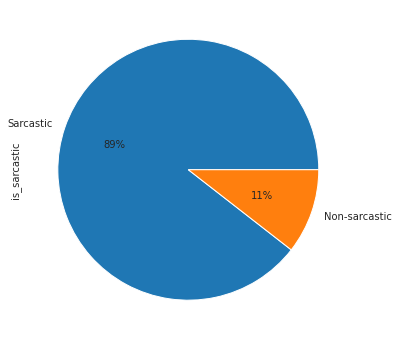

In [36]:
print('--'*30); print('Checking 5 random headlines and labels from the data where the length of headline is > 100'); print('--'*30)
indexes = list(data.loc[data['headline'].str.len() > 100, 'headline'].index)
rands = random.sample(indexes, 5)
headlines, labels = list(data.loc[rands, 'headline']), list(data.loc[rands, 'is_sarcastic'])

_ = [print(f'Headline: {head}\nlabel: {label}\n') for head, label in zip(headlines, labels)]

print('--'*30); print('Distributon of label where the length of headline is > 100'); print('--'*30)
_ = data.loc[indexes, 'is_sarcastic'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = ['Sarcastic', 'Non-sarcastic'], figsize = (10, 6))


> **We can see that the data is fairly balanced**

> **44% of the data have sarcastic labels whereas 56% don't.**

> **There are no headlines from HuffPost that are sarcastic whereas all but one from The Onion are sarcastic.**

> **Based on some random headlines seen above, it appears that the data is mostly lower-cased. Pre-processing such as removing punctuations and lemmatization can be used.**

> **There are digits in the headlines for e.g. 3 things i needed to hear when i weighed 300 pounds where removing the digits wouldn't help.**

> **83% of data where length of sentence (headlines) > 100 are sarcastic headlines.**

> **Article link doesnt add any value which can be removed in further steps**




### **2. Retain relevant columns**


In [37]:
del data['article_link'] 


In [38]:
data.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


In [39]:
print('--'*30); print('Converting headlines to lower case')
data['cleaned_headline'] = data['headline'].apply(lambda x : x.lower())

print('Replacing apostrophes to the standard lexicons')
data['cleaned_headline'] = data['cleaned_headline'].apply(lambda x : replace_words(x))

print('Removing punctuations')
data['cleaned_headline'] = data['cleaned_headline'].apply(lambda x: remove_punctuation(x))

print('Applying Lemmatizer')
data['cleaned_headline'] = data['cleaned_headline'].apply(lambda x: lem(x))

print('Removing multiple spaces between words')
data['cleaned_headline'] = data['cleaned_headline'].apply(lambda x: re.sub(' +', ' ', x))

print('Removing stopwords')
data['cleaned_headline'] = data['cleaned_headline'].apply(lambda x: remove_stopwords(x))
print('--'*30)

------------------------------------------------------------
Converting headlines to lower case
Replacing apostrophes to the standard lexicons
Removing punctuations
Applying Lemmatizer
Removing multiple spaces between words
Removing stopwords
------------------------------------------------------------


In [40]:
data.head()

,is_sarcastic,headline,cleaned_headline
0,1,thirtysomething scientists unveil doomsday clo...,thirtysomething scientist unveil doomsday cloc...
1,0,dem rep. totally nails why congress is falling...,dem rep totally nail congress falling short ge...
2,0,eat your veggies: 9 deliciously different recipes,eat veggie 9 deliciously different recipe
3,1,inclement weather prevents liar from getting t...,inclement weather prevents liar getting work
4,1,mother comes pretty close to using word 'strea...,mother come pretty close using word streaming ...


### ****3. Get length of each sentence****

In [41]:
print('--'*40); print('Get the length of each line, find the maximum length and print the maximum length line'); 
print('Length of line ranges from 7 to 241.'); print('--'*40)
# Get length of each line
data['line_length'] = data['cleaned_headline'].str.len()

print('Minimum line length: {}'.format(data['line_length'].min()))
print('Maximum line length: {}'.format(data['line_length'].max()))
print('Line with maximum length: {}'.format(data[data['line_length'] == data['line_length'].max()]['cleaned_headline'].values[0]))

--------------------------------------------------------------------------------
Get the length of each line, find the maximum length and print the maximum length line
Length of line ranges from 7 to 241.
--------------------------------------------------------------------------------
Minimum line length: 2
Maximum line length: 704
Line with maximum length: hot wheel ranked number one toy rolling ramp knocking domino send marble funnel dropping onto teetertotter yank string causing pulley system raise wooden block propelling series twine roller unwind spring launching tennis ball across room inching tire slope hit power switch activating table fan blow toy ship nail attached across kiddie pool popping water balloon fill cup weighing lever force basketball track nudging broomstick axis rotate allowing golf ball roll sideways coffee mug tumble row hardcover book handle catch hook attached lever cause wooden mallet slam serving spoon catapulting small ball cup attached ribbon lazy susan s

In [42]:
data.head()

,is_sarcastic,headline,cleaned_headline,line_length
0,1,thirtysomething scientists unveil doomsday clo...,thirtysomething scientist unveil doomsday cloc...,57
1,0,dem rep. totally nails why congress is falling...,dem rep totally nail congress falling short ge...,66
2,0,eat your veggies: 9 deliciously different recipes,eat veggie 9 deliciously different recipe,41
3,1,inclement weather prevents liar from getting t...,inclement weather prevents liar getting work,44
4,1,mother comes pretty close to using word 'strea...,mother come pretty close using word streaming ...,55


In [43]:
print('--'*40); print('Get the number of words, find the maximum number of words and print the maximum number of words'); 
print('Number of words ranges from 2 to 39.'); print('--'*40)
# Get length of each line
data['nb_words'] = data['cleaned_headline'].apply(lambda x: len(x.split(' ')))

print('Minimum number of words: {}'.format(data['nb_words'].min()))
print('Maximum number of words: {}'.format(data['nb_words'].max()))
print('Line with maximum number of words: {}'.format(data[data['nb_words'] == data['nb_words'].max()]['cleaned_headline'].values[0]))

--------------------------------------------------------------------------------
Get the number of words, find the maximum number of words and print the maximum number of words
Number of words ranges from 2 to 39.
--------------------------------------------------------------------------------
Minimum number of words: 1
Maximum number of words: 106
Line with maximum number of words: hot wheel ranked number one toy rolling ramp knocking domino send marble funnel dropping onto teetertotter yank string causing pulley system raise wooden block propelling series twine roller unwind spring launching tennis ball across room inching tire slope hit power switch activating table fan blow toy ship nail attached across kiddie pool popping water balloon fill cup weighing lever force basketball track nudging broomstick axis rotate allowing golf ball roll sideways coffee mug tumble row hardcover book handle catch hook attached lever cause wooden mallet slam serving spoon catapulting small ball cup at

In [68]:
data.head()

,is_sarcastic,headline,cleaned_headline,line_length,nb_words
0,1,thirtysomething scientists unveil doomsday clo...,thirtysomething scientist unveil doomsday cloc...,57,7
1,0,dem rep. totally nails why congress is falling...,dem rep totally nail congress falling short ge...,66,10
2,0,eat your veggies: 9 deliciously different recipes,eat veggie 9 deliciously different recipe,41,6
3,1,inclement weather prevents liar from getting t...,inclement weather prevents liar getting work,44,6
4,1,mother comes pretty close to using word 'strea...,mother come pretty close using word streaming ...,55,8


### **4. Define parameters**

In [44]:
max_features = 10000
maxlen = data['nb_words'].max()
embedding_size = 50

### **5. Get indices for words**
### **6. Create features and labels**
### **7. Get vocabulary size**

**Order for 5,6,7 are different, so below we will be creating the feature and labels and get vocabulary size and then we will be getting indices with tokenizer.**

Word Cloud of Sarcastic and Non-sarcastic Headlines


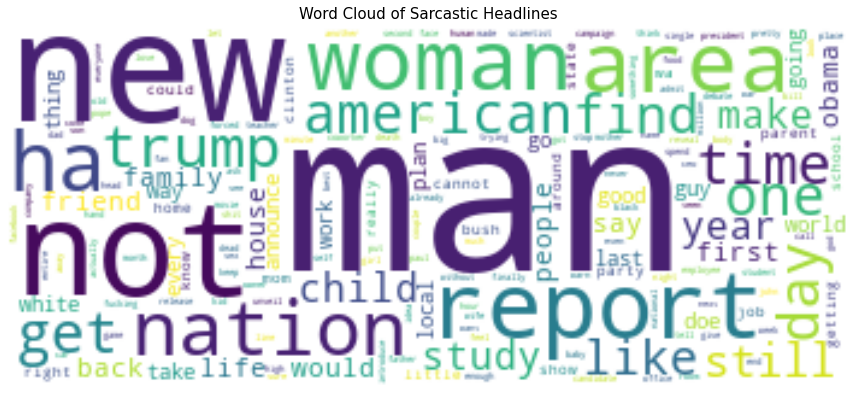

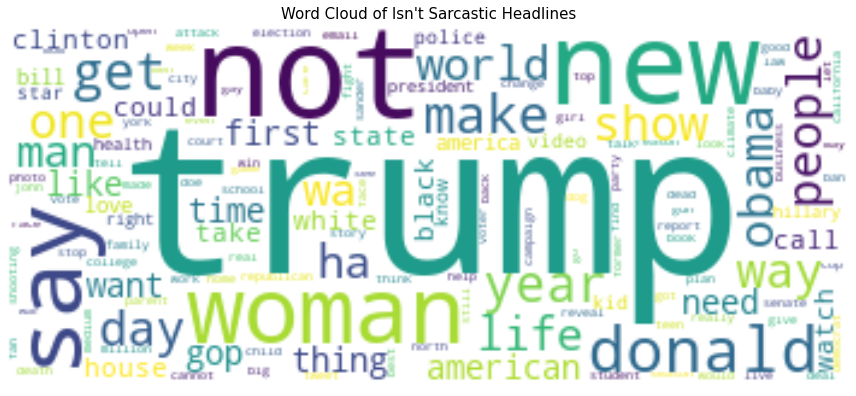

In [45]:
print('Word Cloud of Sarcastic and Non-sarcastic Headlines')
data['headline'] = data['headline'].fillna('')
sarcastic_headlines = ' '.join(data.loc[data['is_sarcastic'] == 1, 'cleaned_headline'])
plot_wordcloud(sarcastic_headlines, title = 'Word Cloud of Sarcastic Headlines')

non_sarcastic_headlines = ' '.join(data.loc[data['is_sarcastic'] == 0, 'cleaned_headline'])
plot_wordcloud(non_sarcastic_headlines, title = 'Word Cloud of Isn\'t Sarcastic Headlines')

In [46]:
print('--'*30); print('Five point summary for number of words')
display(data['nb_words'].describe().round(0).astype(int)); 

print('99% quantilie: {}'.format(data['nb_words'].quantile(0.99)));print('--'*30)

------------------------------------------------------------
Five point summary for number of words


count    28619
mean         7
std          2
min          1
25%          6
50%          7
75%          9
max        106
Name: nb_words, dtype: int64

99% quantilie: 13.0
------------------------------------------------------------


In [47]:
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(list(data['cleaned_headline']))

**6. Create features and labels**

**Below we will be creating the feature and labels**

In [48]:
X = tokenizer.texts_to_sequences(data['cleaned_headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(data['is_sarcastic'])

print(f'Number of Samples: {len(X)}')
print(f'Number of Labels: {len(y)}')
print(f'\nFirst headline:\n{X[0]}\n\nLabel of the first headline: {y[0]}')

Number of Samples: 28619
Number of Labels: 28619

First headline:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0  242 2849 5664 1959  595  994]

Label of the first headline: 1


**7. Get vocabulary size**

**Below we will get the vocabulary size**

In [49]:
w2i = tokenizer.word_index
vocab_size = len(w2i) + 1
print(f'Number of unique tokens: {vocab_size}')

Number of unique tokens: 25912


**5. Getting indices for words**

**Below we are printing indices for the words**

In [70]:
w2i

{'trump': 1,
 'not': 2,
 'new': 3,
 'man': 4,
 'woman': 5,
 'say': 6,
 'report': 7,
 'ha': 8,
 'u': 9,
 'get': 10,
 'one': 11,
 'day': 12,
 'time': 13,
 'make': 14,
 'american': 15,
 'year': 16,
 'area': 17,
 'donald': 18,
 'like': 19,
 'life': 20,
 'first': 21,
 'people': 22,
 'nation': 23,
 'way': 24,
 'house': 25,
 'world': 26,
 'thing': 27,
 'show': 28,
 'white': 29,
 'wa': 30,
 'still': 31,
 'find': 32,
 'obama': 33,
 'back': 34,
 'take': 35,
 'family': 36,
 'would': 37,
 'clinton': 38,
 'could': 39,
 'child': 40,
 'want': 41,
 'state': 42,
 'know': 43,
 'doe': 44,
 'school': 45,
 'right': 46,
 'call': 47,
 'mom': 48,
 'study': 49,
 'need': 50,
 'black': 51,
 'gop': 52,
 'kid': 53,
 'go': 54,
 'bill': 55,
 'president': 56,
 'friend': 57,
 '5': 58,
 'look': 59,
 'love': 60,
 'plan': 61,
 'cannot': 62,
 'watch': 63,
 'really': 64,
 'death': 65,
 'home': 66,
 'parent': 67,
 'america': 68,
 'good': 69,
 'police': 70,
 'best': 71,
 'video': 72,
 'going': 73,
 'star': 74,
 'work': 75,
 

### **8. Create a weight matrix using GloVe embeddings**

In [50]:
EMBEDDING_FILE = project_path+'DataSet - glove.6B.50d (1).txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(' ')[0]
    embd = o.split(' ')[1:]
    embd = np.asarray(embd, dtype = 'float32')
    embeddings[word] = embd

In [51]:
num_words = min(max_features, vocab_size) + 1

embedding_matrix = np.zeros((num_words, embedding_size))
for word, i in tokenizer.word_index.items():
    if i > max_features: continue
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

### **9. Define and compile a Bidirectional LSTM model.**

 Hint: Be analytical and experimental here in trying new approaches to design the best model.

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state, shuffle = True)

print('---'*20, f'\nNumber of rows in training dataset: {x_train.shape[0]}')
print(f'Number of columns in training dataset: {x_train.shape[1]}')
print(f'Number of unique words in training dataset: {len(np.unique(np.hstack(x_train)))}')

print('---'*20, f'\nNumber of rows in test dataset: {x_test.shape[0]}')
print(f'Number of columns in test dataset: {x_test.shape[1]}')
print(f'Number of unique words in test dataset: {len(np.unique(np.hstack(x_test)))}')

------------------------------------------------------------ 
Number of rows in training dataset: 22895
Number of columns in training dataset: 106
Number of unique words in training dataset: 9966
------------------------------------------------------------ 
Number of rows in test dataset: 5724
Number of columns in test dataset: 106
Number of unique words in test dataset: 7567


In [53]:
model = Sequential()
model.add(Embedding(num_words, embedding_size, embeddings_initializer = Constant(embedding_matrix), input_length = maxlen, trainable = False))
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5, input_shape = (256,)))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5, input_shape = (128,)))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5, input_shape = (64,)))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Adding callbacks
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)  
mc = ModelCheckpoint('sarcasm_detector.h5', monitor = 'val_loss', mode = 'min', save_best_only = True, verbose = 1)
lr_r = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 5),
logdir = 'log'; tb = TensorBoard(logdir, histogram_freq = 1)
callbacks = [es, mc, lr_r, tb]

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 106, 50)           500050    
                                                                 
 bidirectional (Bidirectiona  (None, 106, 256)         183296    
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 256)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)              

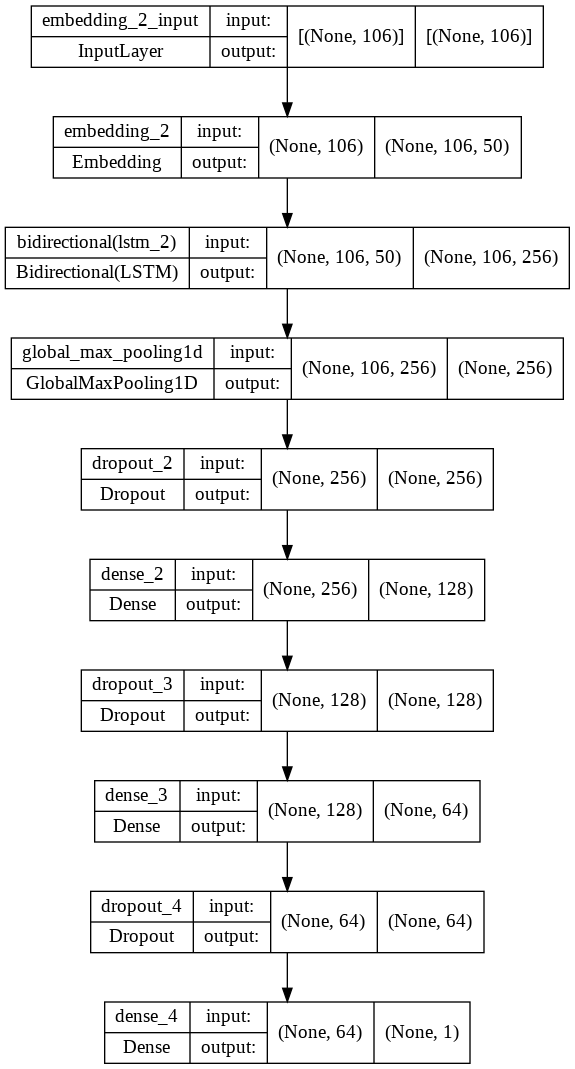

In [54]:
tf.keras.utils.plot_model(model, show_shapes = True)


### **10. Fit the model and check the validation accuracy**



In [61]:
batch_size = 1000
epochs = 100

h = model.fit(x_train, y_train, epochs = epochs, validation_split = 0.2, batch_size = batch_size, verbose = 2, callbacks = callbacks)

Epoch 1/100

Epoch 1: val_loss improved from 0.47022 to 0.46404, saving model to sarcasm_detector.h5
19/19 - 16s - loss: 0.4350 - accuracy: 0.7998 - val_loss: 0.4640 - val_accuracy: 0.7790 - lr: 0.0010 - 16s/epoch - 842ms/step
Epoch 2/100

Epoch 2: val_loss improved from 0.46404 to 0.46053, saving model to sarcasm_detector.h5
19/19 - 16s - loss: 0.4230 - accuracy: 0.8049 - val_loss: 0.4605 - val_accuracy: 0.7814 - lr: 0.0010 - 16s/epoch - 828ms/step
Epoch 3/100

Epoch 3: val_loss improved from 0.46053 to 0.45918, saving model to sarcasm_detector.h5
19/19 - 15s - loss: 0.4169 - accuracy: 0.8079 - val_loss: 0.4592 - val_accuracy: 0.7866 - lr: 0.0010 - 15s/epoch - 802ms/step
Epoch 4/100

Epoch 4: val_loss did not improve from 0.45918
19/19 - 14s - loss: 0.4135 - accuracy: 0.8107 - val_loss: 0.4592 - val_accuracy: 0.7873 - lr: 0.0010 - 14s/epoch - 761ms/step
Epoch 5/100

Epoch 5: val_loss improved from 0.45918 to 0.45855, saving model to sarcasm_detector.h5
19/19 - 15s - loss: 0.4079 - acc

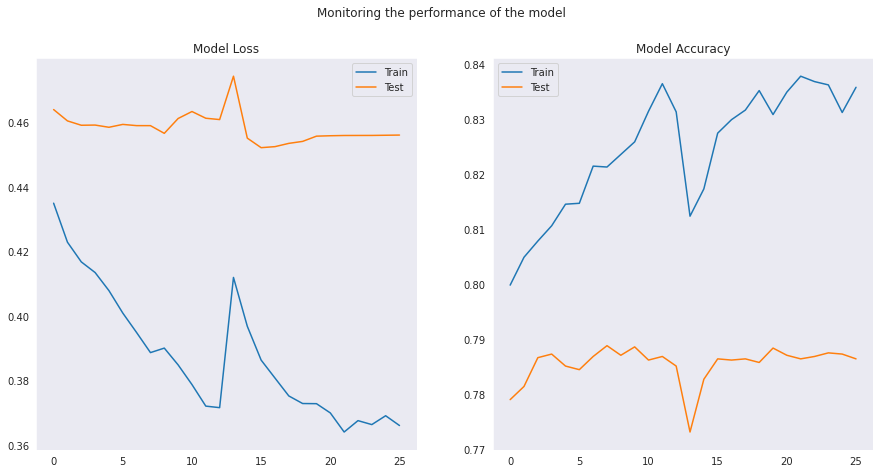

In [62]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7.2))
f.suptitle('Monitoring the performance of the model')

ax1.plot(h.history['loss'], label = 'Train')
ax1.plot(h.history['val_loss'], label = 'Test')
ax1.set_title('Model Loss')
ax1.legend(['Train', 'Test'])

ax2.plot(h.history['accuracy'], label = 'Train')
ax2.plot(h.history['val_accuracy'], label = 'Test')
ax2.set_title('Model Accuracy')
ax2.legend(['Train', 'Test'])

plt.show()

In [63]:
loss, accuracy = model.evaluate(x_test, y_test, verbose = 0)
print('Overall Accuracy: {}'.format(round(accuracy * 100, 0)))

Overall Accuracy: 79.0


In [64]:
y_pred = (model.predict(x_test) > 0.5).astype('int32')
print(f'Classification Report:\n{classification_report(y_pred, y_test)}')

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      3103
           1       0.76      0.79      0.77      2621

    accuracy                           0.79      5724
   macro avg       0.79      0.79      0.79      5724
weighted avg       0.79      0.79      0.79      5724



------------------------------------------------------------
Confusion Matrix


,Non-sarcastic,Sarcastic
Non-sarcastic,2441,554
Sarcastic,662,2067


------------------------------------------------------------


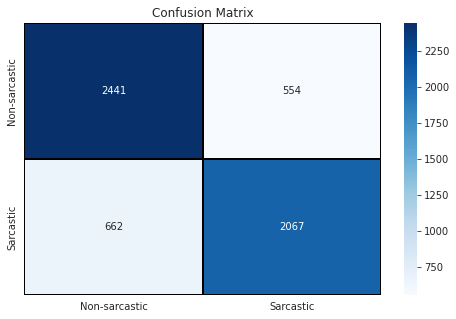

In [65]:
print('--'*30); print('Confusion Matrix')
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm , index = ['Non-sarcastic', 'Sarcastic'] , columns = ['Non-sarcastic','Sarcastic'])
display(cm); print('--'*30)

plt.figure(figsize = (8, 5))
_ = sns.heatmap(cm, cmap= 'Blues', linecolor = 'black' , linewidth = 1 , annot = True, 
            fmt = '' , xticklabels = ['Non-sarcastic', 'Sarcastic'], 
            yticklabels = ['Non-sarcastic', 'Sarcastic']).set_title('Confusion Matrix')

# **CONCLUSION**

### **First we read the data and did exploratory analysis and found :**

> **We can see that the data is fairly balanced**

> **44% of the data have sarcastic labels whereas 56% don't.**

> **There are no headlines from HuffPost that are sarcastic whereas all but one from The Onion are sarcastic.**

> **Based on some random headlines seen above, it appears that the data is mostly lower-cased. Pre-processing such as removing punctuations and lemmatization can be used.**

> **There are digits in the headlines for e.g. 3 things i needed to hear when i weighed 300 pounds where removing the digits wouldn't help.**

> **83% of data where length of sentence (headlines) > 100 are sarcastic headlines.**

> **Article link doesnt add any value which can be removed in further steps**

### **We removed irrelevant data**

### **We explored length of each element and defined parameter**

### **Then we processed the data with tokenisation, got the indices and did other preprocessing**

### **We created feature and labels**

### **Also we saw the size of voabulary**

### **We created a weight matrix using GloVe embeddings with provided embeddings**

### **We defined and compiled a Bidirectional LSTM model.**

### **We fit the model and check the validation accuracy**


## **Overall Accuracy: 79.0**

# **Classification Report:**
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      3103
           1       0.76      0.79      0.77      2621

                  precision    recall  f1-score   support.  
      macro avg       0.79      0.79      0.79      5724.  
    weighted avg      0.79      0.79      0.79      5724. 


------------------------------------
------------------------------------

# END

------------------------------------
------------------------------------